<a href="https://colab.research.google.com/github/RodrigoMunoz-dev/Challenge-TelecomX-parte-2/blob/main/Challenge_TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
# Cargar el archivo procesado
df = pd.read_csv('TelecomX_Tratado.csv')

# Verificar que los datos se cargaron correctamente
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    0.0  female              0        1           1       9   
1  0003-MKNFE    0.0    male              0        0           0       9   
2  0004-TLHLJ    1.0    male              0        0           0       4   
3  0011-IGKFF    1.0    male              1        1           0      13   
4  0013-EXCHZ    1.0  female              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1            no             dsl  ...               no   
1             1           yes             dsl  ...               no   
2             1            no     fiber optic  ...              yes   
3             1            no     fiber optic  ...              yes   
4             1            no     fiber optic  ...               no   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
df = df.drop(columns=['customerID'])

In [7]:
# Convertimos las variables de texto en columnas numéricas de 0 y 1
df_final = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod',
                                       'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                       'DeviceProtection', 'TechSupport', 'StreamingTV',
                                       'StreamingMovies'])

# Verificamos cómo quedó
print(df_final.head())

   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0              0        1           1       9             1   
1    0.0              0        0           0       9             1   
2    1.0              0        0           0       4             1   
3    1.0              1        1           0      13             1   
4    1.0              1        1           0       3             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Cuentas_Diarias  ...  \
0                 1            65.6        593.30         2.186667  ...   
1                 0            59.9        542.40         1.996667  ...   
2                 1            73.9        280.85         2.463333  ...   
3                 1            98.0       1237.85         3.266667  ...   
4                 1            83.9        267.40         2.796667  ...   

   OnlineBackup_no  OnlineBackup_yes  DeviceProtection_no  \
0            False              True                 True   
1     

In [8]:
# Eliminamos filas donde Churn sea nulo, ya que es lo que queremos predecir
df_final = df_final.dropna(subset=['Churn'])

# Convertimos Churn a entero (0 o 1)
df_final['Churn'] = df_final['Churn'].astype(int)

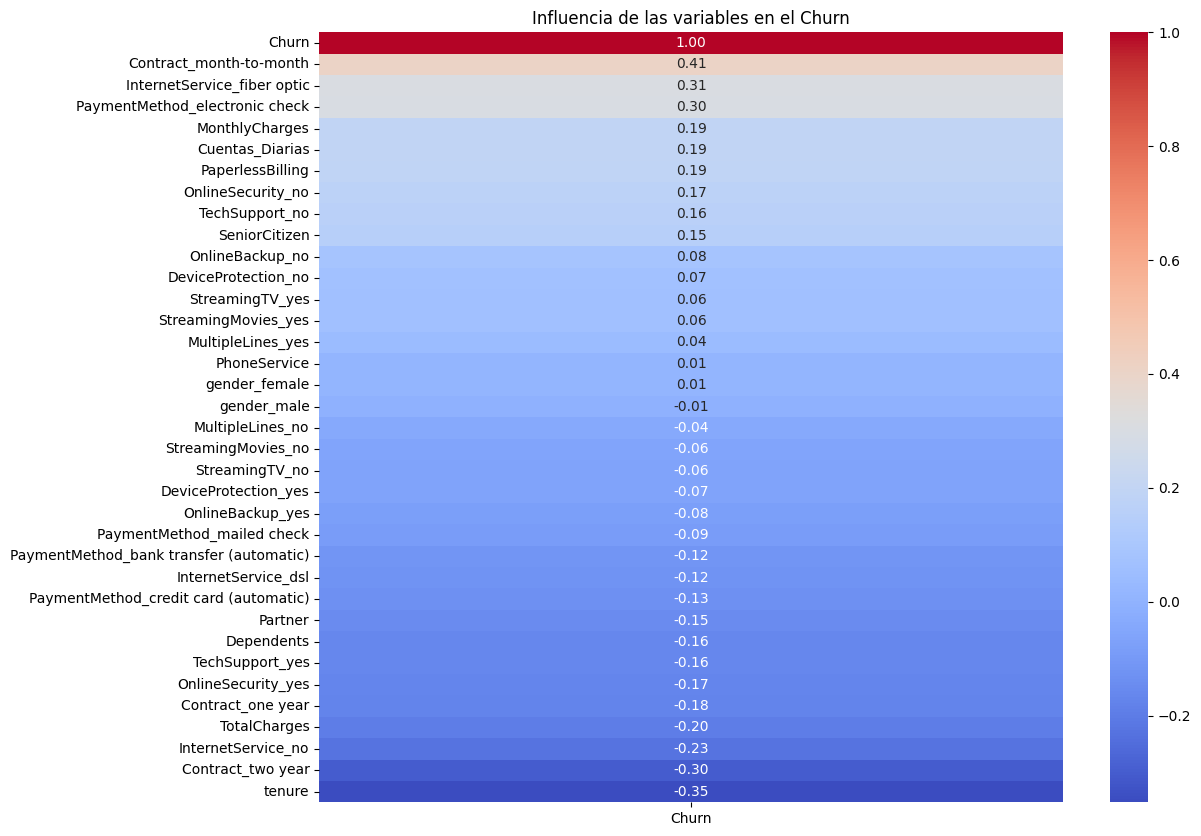

Variables con mayor correlación positiva (aumentan el riesgo):
Churn                             1.000000
Contract_month-to-month           0.405103
InternetService_fiber optic       0.308020
PaymentMethod_electronic check    0.301919
MonthlyCharges                    0.193356
Name: Churn, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Eliminamos el ID ya que no tiene valor estadístico
df_model = df.drop(columns=['customerID'], errors='ignore')

# 2. Convertimos variables categóricas a numéricas (One-Hot Encoding)
# Esto crea columnas de 0 y 1 para que el modelo pueda procesarlas.
df_model = pd.get_dummies(df_model)

# 3. Calculamos la correlación específica con la columna 'Churn'
correlacion_churn = df_model.corr()['Churn'].sort_values(ascending=False)

# 4. Visualizamos con un Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_model.corr()[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Influencia de las variables en el Churn')
plt.show()

print("Variables con mayor correlación positiva (aumentan el riesgo):")
print(correlacion_churn.head(5))

In [13]:
# 1. Eliminar filas donde 'Churn' sea nulo
df_model = df_model.dropna(subset=['Churn'])

# 2. Asegurarnos de que sea tipo entero (0 o 1)
df_model['Churn'] = df_model['Churn'].astype(int)

# 3. Volver a definir X e y con los datos limpios
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

# 4. Volver a separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora ya puedes correr el modelo sin errores
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [14]:
from sklearn.model_selection import train_test_split

# Definimos X (características) y y (objetivo)
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Set de entrenamiento: {X_train.shape[0]} registros")
print(f"Set de prueba: {X_test.shape[0]} registros")

Set de entrenamiento: 5634 registros
Set de prueba: 1409 registros


In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 1. Crear y entrenar el modelo de Regresión Lineal
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# 2. Extraer los coeficientes para entender el impacto
# Un coeficiente positivo alto indica que la variable aumenta mucho el riesgo de Churn
coeficientes = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': model_lin.coef_})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

print("Impacto de las variables (Top 5 que impulsan el Churn):")
print(coeficientes.head(5))

print("\nImpacto de las variables (Top 5 que retienen al cliente):")
print(coeficientes.tail(5))

Impacto de las variables (Top 5 que impulsan el Churn):
                          Variable  Coeficiente
14     InternetService_fiber optic     0.202421
28         Contract_month-to-month     0.065018
33  PaymentMethod_electronic check     0.060665
5                 PaperlessBilling     0.038329
0                    SeniorCitizen     0.038198

Impacto de las variables (Top 5 que retienen al cliente):
              Variable  Coeficiente
26  StreamingMovies_no    -0.031179
11    MultipleLines_no    -0.032196
24      StreamingTV_no    -0.035796
29   Contract_one year    -0.048326
15  InternetService_no    -0.190060


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Crear y entrenar el modelo de Clasificación
model_log = LogisticRegression(max_iter=5000)
model_log.fit(X_train, y_train)

# 2. Predecir en el set de prueba
y_pred_log = model_log.predict(X_test)

# 3. Evaluar el rendimiento
print("--- MÉTRICAS DE CLASIFICACIÓN ---")
print(f"Precisión General (Accuracy): {accuracy_score(y_test, y_pred_log):.2%}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\nReporte Detallado:")
print(classification_report(y_test, y_pred_log));

--- MÉTRICAS DE CLASIFICACIÓN ---
Precisión General (Accuracy): 80.70%

Matriz de Confusión:
[[936 100]
 [172 201]]

Reporte Detallado:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [19]:
from sklearn.preprocessing import StandardScaler

# 1. Instanciar el escalador
scaler = StandardScaler()

# 2. Ajustar y transformar los datos de entrenamiento
# Solo escalamos las X (las características)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformar los datos de prueba (usando el mismo ajuste del entrenamiento)
X_test_scaled = scaler.transform(X_test)

# 4. Volver a entrenar el modelo con los datos escalados
model_log_scaled = LogisticRegression(max_iter=5000)
model_log_scaled.fit(X_train_scaled, y_train)

# 5. Evaluar
y_pred_scaled = model_log_scaled.predict(X_test_scaled)
print(f"Nueva Precisión General (Escalada): {accuracy_score(y_test, y_pred_scaled):.2%}")
print("\nNuevo Reporte Detallado:")
print(classification_report(y_test, y_pred_scaled))

Nueva Precisión General (Escalada): 80.62%

Nuevo Reporte Detallado:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

